# Thesis Analysis on TA35 
> Here Ill use some strategy to analyze the the TA35 stocks and compare Buy and hold to arima pridiction 

> Prototype for Final project Master's degree yeshurun BA

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
#| default_exp thesis_ta35

In [ ]:
#| export

from buy_and_hold_vs_arima.arima_stats import create_auto_arima_prediction_future_2
from buy_and_hold_vs_arima.arima_stats import create_dataframe_with_series
from buy_and_hold_vs_arima.arima_stats import top_score
from buy_and_hold_vs_arima.arima_stats import get_top_players
from buy_and_hold_vs_arima.arima_stats import create_dataframe
import buy_and_hold_vs_arima
import yfinance as yf
import pandas as pd 
import numpy as np 

[*********************100%%**********************]  1 of 1 completed


<Axes: >

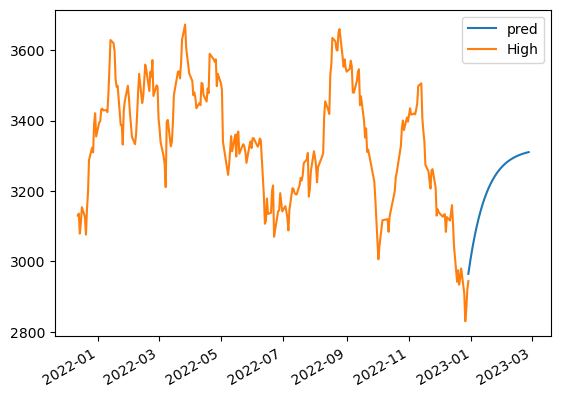

In [ ]:
# examples ! on how to use an arima model 
series_data = yf.download('LUMI.TA', start='2021-12-10', end='2022-12-30')
df = create_dataframe_with_series(create_auto_arima_prediction_future_2 , series_data['High'])
df.plot()

[*********************100%%**********************]  1 of 1 completed


<Axes: >

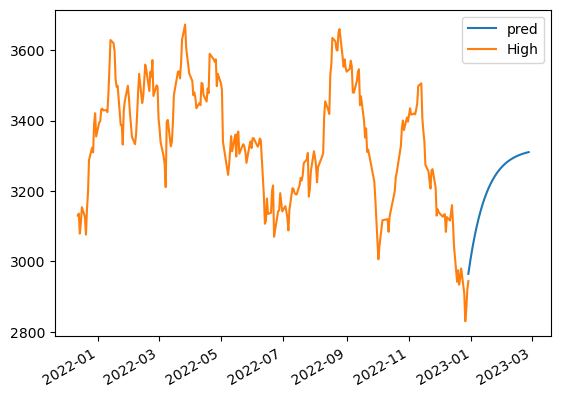

In [ ]:
# examples ! on how to use an arima model 
series_data = yf.download('LUMI.TA', start='2021-12-10', end='2022-12-30')
df = create_dataframe_with_series(create_auto_arima_prediction_future_2 , series_data['High'])
df.plot()

## Creating the TA35 data 

[*********************100%%**********************]  1 of 1 completed


<Axes: >

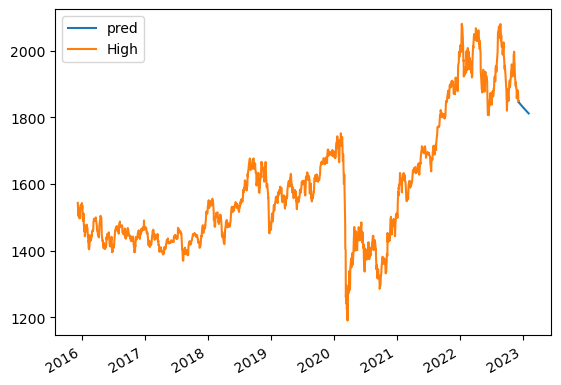

In [ ]:
# examples ! on how to use an arima model 
series_data = yf.download('TA35.TA', start='2015-12-10', end='2022-12-10')
df = create_dataframe_with_series(create_auto_arima_prediction_future_2 , series_data['High'],future = 150)
df.plot()


### How to compare results 
- Regular difference 
- [Relative Difference ](https://en.wikipedia.org/wiki/Relative_change)
$$  \text{Relative change}(v_\text{ref}, v) = \frac{\text{Actual change}}{v_\text{ref}} = \frac{v - v_\text{ref}}{v_\text{ref}} $$

In [ ]:
#| export
def show_all_difference(initial_price , final_price,logger=False):
    """Compare the prices via known differences"""
    if logger:
        print("Initial Price is :" , initial_price)
        print("Final Price is :" , final_price)
        print("Buy and hold overall revenue: ",final_price - initial_price) 
        print("Buy and hold relative difference " , (final_price - initial_price) / initial_price)
    return (final_price - initial_price) / initial_price

In [ ]:
show_all_difference(df['High'].dropna().iloc[0] , df['High'].dropna().iloc[-1])

0.1982294302573238

In [ ]:
## Create a recursive function for prediction 

In [ ]:
#| export
def get_revenue_arima(func, series_data , future = 30):
    df = create_dataframe_with_series(func , series_data,future = future)
    relative_diff = show_all_difference(df['pred'].dropna().iloc[0] , df['pred'].dropna().iloc[-1])
    return df , relative_diff

[*********************100%%**********************]  1 of 1 completed


<Axes: >

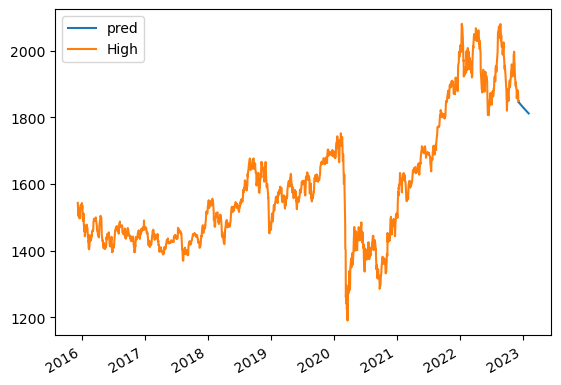

In [ ]:
series_data = yf.download('TA35.TA', start='2015-12-10', end='2022-12-10')

df, relative_diff = get_revenue_arima(create_auto_arima_prediction_future_2 , series_data['High'],future=30)
df.plot()

Relative diff  -0.02021180661952111


<Axes: >

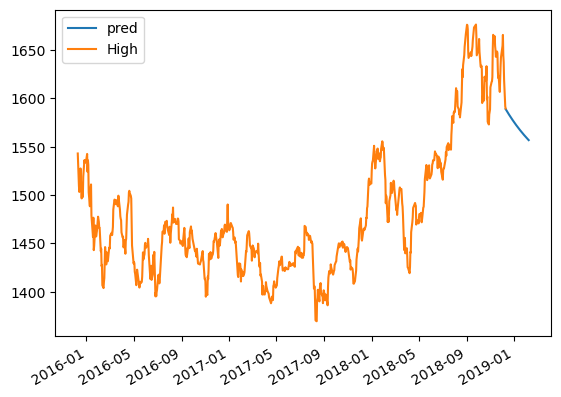

In [ ]:
df , relative_diff = get_revenue_arima(create_auto_arima_prediction_future_2 , series_data['High'].loc[:'2018-12-10'],future=30)
print("Relative diff " , relative_diff)
df.plot()


In [ ]:
#| export 
def strategy_invest(func, series_data , future = 30,start= '2017-12-31', end= '2020-10-11'):
    """
    Create a simulation that evaluate the prediction 
    func -> a function that given pd.Series create a prediction to next 30 days 
    return 
    count_invested_months -> is the number of the invested and profit month 
    total_months -> the total number of iteration of invest\not invest months
    capital -> the simulation start with 100 capital and return the last capital in the simulation 
    """
    count_invested_months , total_months = 0,0
    length_series = len(series_data)
    #change_invest_arr = pd.date_range('2017-12-31', freq="M", periods=5*12 -1) # 5 years in months
    #change_invest_arr = pd.date_range(start=series_data.index[length_series//4],end=series_data.index[-1] ,freq="M") # 5 years in months
    change_invest_arr = pd.date_range(start=start,end=end ,freq="M") # 5 years in months

    print("barak")
    capital = 100
    expected_diff_arr = []
    revenue_loss_diff_arr = []
    current_date_arr = []
    capital_arr = []
    
    for current_date,next_date in zip(change_invest_arr,change_invest_arr[1:]):
        total_months += 1
        df , relative_diff = get_revenue_arima(create_auto_arima_prediction_future_2 , series_data.loc[:current_date],future=30)
        real_relative_diff = show_all_difference(series_data.loc[current_date:].iloc[0],series_data.loc[next_date:].iloc[0])
        prev_capital = capital
        if relative_diff > 0:
            count_invested_months += 1
            capital *= (1+real_relative_diff)
        print("----------------------------------------------------------")
        print("expected relative diff : ", relative_diff)
        print("Da facto Revenue/loss " , capital - prev_capital)
        print("current date : " , current_date)
        print("current capital: " , capital)
        expected_diff_arr.append(relative_diff)
        revenue_loss_diff_arr.append(capital - prev_capital)
        current_date_arr.append(current_date)
        capital_arr.append(capital)
    return count_invested_months , total_months , expected_diff_arr , revenue_loss_diff_arr , current_date_arr , capital_arr
    

### Buy and Hold Spec
Here is a tester for buy and hold spec

The selected dates are from '2017-12-31' to date '2022-09-30'

Buy and hold strategy given 100 units it returns **120.3422** 

In [ ]:
show_all_difference(series_data['High'].loc['2017-12-31':].iloc[0],series_data['High'].loc['2022-09-30':].iloc[0])

0.20342226091677398

### Arima Spec
Here is a tester for arima prediction 

The selected dates are from '2017-12-31' to date '2022-09-30'

Arima prediction operate: given 100 units it returns  **121.00688735284602**

In [ ]:
series_data['High']

Date
2015-12-10    1543.010010
2015-12-13    1509.239990
2015-12-14    1503.229980
2015-12-15    1510.819946
2015-12-16    1515.640015
                 ...     
2022-12-04    1877.979980
2022-12-05    1878.810059
2022-12-06    1868.989990
2022-12-07    1847.869995
2022-12-08    1848.880005
Name: High, Length: 1704, dtype: float64

In [ ]:
#| hide 
count_invested_months , total_months,_,_,_,_ = strategy_invest(create_auto_arima_prediction_future_2 , series_data['High'])
print("overall invested months is : ",count_invested_months)
print("Total months are : " , total_months)

barak
----------------------------------------------------------
expected relative diff :  -0.038386156867646695
Da facto Revenue/loss  0
current date :  2017-12-31 00:00:00
current capital:  100
----------------------------------------------------------
expected relative diff :  -0.046572483103516304
Da facto Revenue/loss  0
current date :  2018-01-31 00:00:00
current capital:  100
----------------------------------------------------------
expected relative diff :  -0.02721090214314456
Da facto Revenue/loss  0
current date :  2018-02-28 00:00:00
current capital:  100
----------------------------------------------------------
expected relative diff :  0.008122964246741301
Da facto Revenue/loss  2.0166798597283275
current date :  2018-03-31 00:00:00
current capital:  102.01667985972833
----------------------------------------------------------
expected relative diff :  -0.010234273229724804
Da facto Revenue/loss  0.0
current date :  2018-04-30 00:00:00
current capital:  102.016679859728

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()